In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

import warnings
#warnings.filterwarnings('ignore')

In [2]:
!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/esercizi/sonar.csv

--2022-03-24 22:20:44--  https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/esercizi/sonar.csv
Resolving frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)... 52.95.148.94
Connecting to frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)|52.95.148.94|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87776 (86K) [text/csv]
Saving to: ‘sonar.csv’

sonar.csv           100%[===================>]  85.72K   174KB/s    in 0.5s    

2022-03-24 22:20:46 (174 KB/s) - ‘sonar.csv’ saved [87776/87776]



In [3]:
# carico e visualizzazione dataset
df = pd.read_csv('sonar.csv') 
df
# problema di classificazione binaria target = 'R'

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0.0200  207 non-null    float64
 1   0.0371  207 non-null    float64
 2   0.0428  207 non-null    float64
 3   0.0207  207 non-null    float64
 4   0.0954  207 non-null    float64
 5   0.0986  207 non-null    float64
 6   0.1539  207 non-null    float64
 7   0.1601  207 non-null    float64
 8   0.3109  207 non-null    float64
 9   0.2111  207 non-null    float64
 10  0.1609  207 non-null    float64
 11  0.1582  207 non-null    float64
 12  0.2238  207 non-null    float64
 13  0.0645  207 non-null    float64
 14  0.0660  207 non-null    float64
 15  0.2273  207 non-null    float64
 16  0.3100  207 non-null    float64
 17  0.2999  207 non-null    float64
 18  0.5078  207 non-null    float64
 19  0.4797  207 non-null    float64
 20  0.5783  207 non-null    float64
 21  0.5071  207 non-null    float64
 22  0.

In [5]:
 df.describe().T

,count,mean,std,min,25%,50%,75%,max
0.0200,207.0,0.029208,0.023038,0.0015,0.01330,0.0228,0.03580,0.1371
0.0371,207.0,0.038443,0.033040,0.0006,0.01640,0.0308,0.04810,0.2339
0.0428,207.0,0.043837,0.038521,0.0015,0.01890,0.0342,0.05820,0.3059
0.0207,207.0,0.054053,0.046583,0.0058,0.02445,0.0441,0.06570,0.4264
0.0954,207.0,0.075105,0.055669,0.0067,0.03770,0.0620,0.10105,0.4010
0.0986,207.0,0.104599,0.059247,0.0102,0.06695,0.0921,0.13415,0.3823
0.1539,207.0,0.121591,0.061897,0.0033,0.08060,0.1056,0.15305,0.3729
0.1601,207.0,0.134677,0.085340,0.0055,0.08035,0.1119,0.16980,0.4590
0.3109,207.0,0.177361,0.118311,0.0075,0.09675,0.1522,0.23150,0.6828
0.2111,207.0,0.208245,0.134741,0.0113,0.11115,0.1810,0.26900,0.7106


In [6]:
df.isnull().sum()

0.0200    0
0.0371    0
0.0428    0
0.0207    0
0.0954    0
         ..
0.0180    0
0.0084    0
0.0090    0
0.0032    0
R         0
Length: 61, dtype: int64

In [7]:
df['R'].value_counts()

M    111
R     96
Name: R, dtype: int64

In [8]:
df.groupby('R').mean()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
R,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022524,0.030232,0.035879,0.041664,0.061680,0.096199,0.113767,0.117153,0.135584,0.158785,...,0.012198,0.010533,0.009673,0.009451,0.008581,0.007333,0.007708,0.006659,0.007058,0.006053


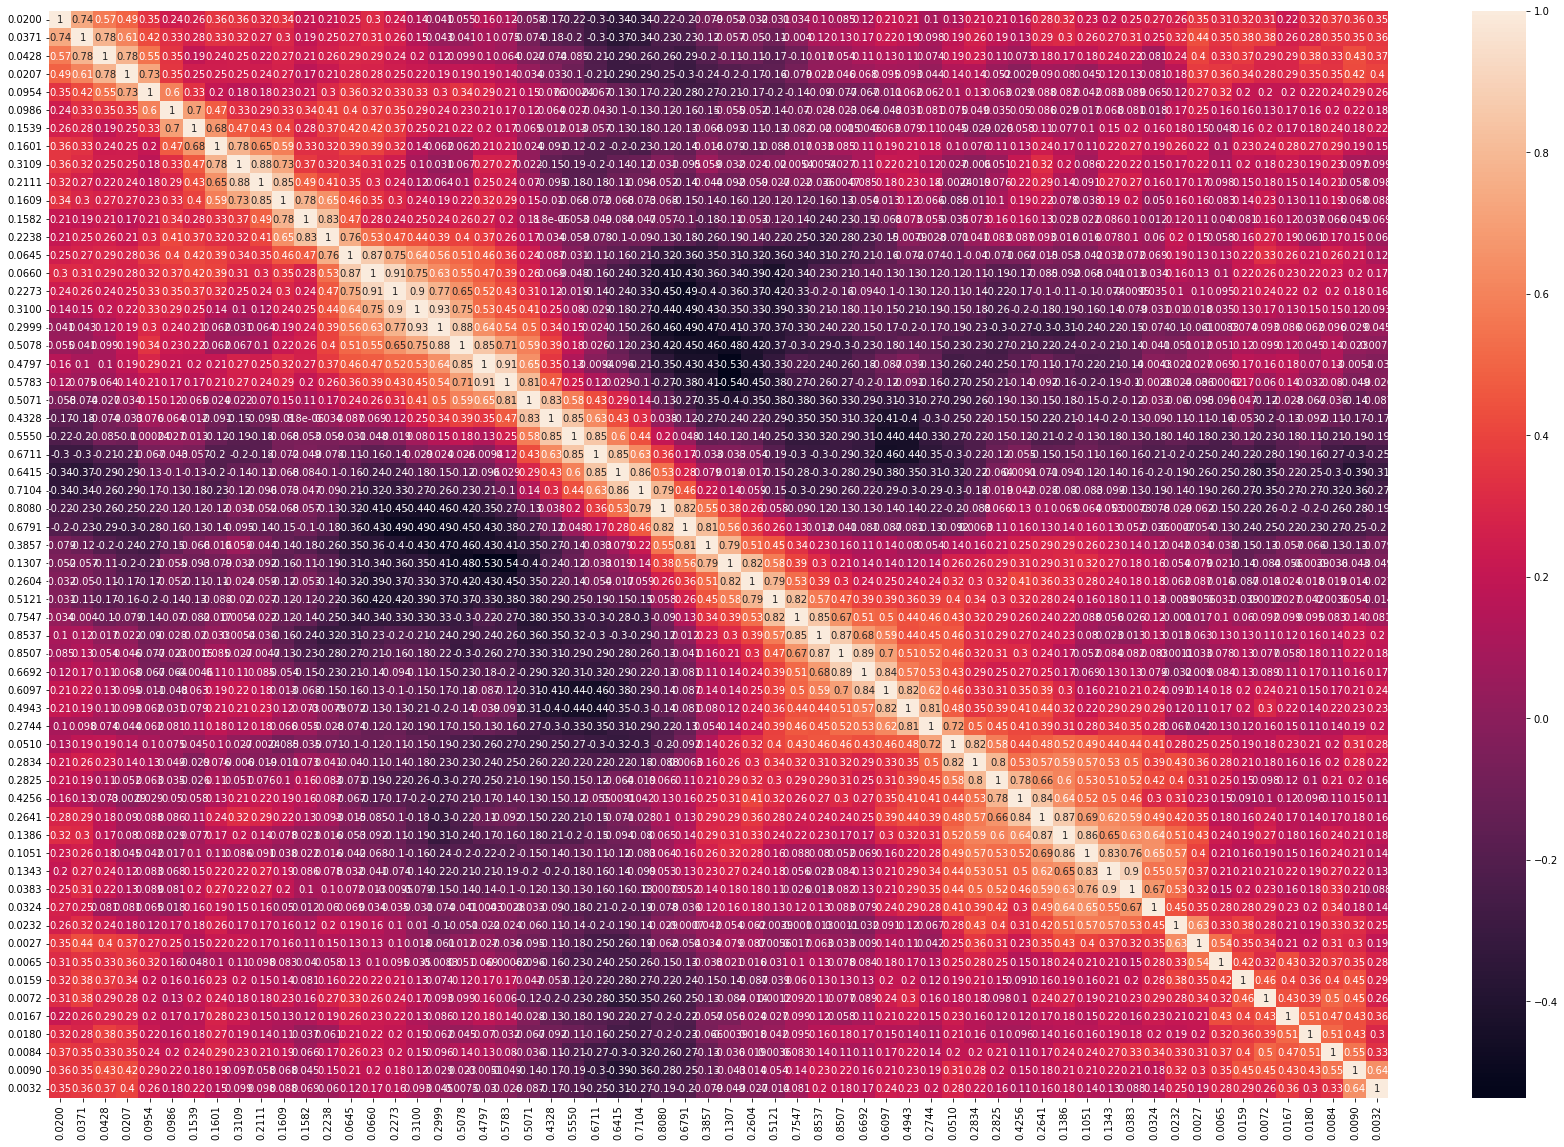

In [9]:
import seaborn as sns

plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),annot=True)

In [10]:
# separating the data and labels
X_ = df.drop(['R'], axis=1)
y = df['R']

In [11]:
sc = StandardScaler()
standardized_data = sc.fit_transform(X_)
print(standardized_data)

[[ 0.70018948  0.42042142  1.0529498  ... -0.4709383  -0.44268846
  -0.42246083]
 [-0.13089402  0.59942737  1.71912994 ...  1.30656071  0.25299833
   0.25405324]
 [-0.83579208 -0.64754631  0.48045125 ... -0.54822087 -0.63683361
   1.03005467]
 ...
 [ 1.00042384  0.15949749 -0.67235266 ...  0.90469137 -0.0382194
  -0.68112798]
 [ 0.0475061  -0.09535845  0.13434985 ... -0.00724291 -0.70154866
  -0.34287094]
 [-0.13959647 -0.06501846 -0.78685237 ... -0.67187297 -0.2970796
   0.99025973]]


In [12]:
X = standardized_data
y = df['R']

In [13]:
print(X)
print(y)

[[ 0.70018948  0.42042142  1.0529498  ... -0.4709383  -0.44268846
  -0.42246083]
 [-0.13089402  0.59942737  1.71912994 ...  1.30656071  0.25299833
   0.25405324]
 [-0.83579208 -0.64754631  0.48045125 ... -0.54822087 -0.63683361
   1.03005467]
 ...
 [ 1.00042384  0.15949749 -0.67235266 ...  0.90469137 -0.0382194
  -0.68112798]
 [ 0.0475061  -0.09535845  0.13434985 ... -0.00724291 -0.70154866
  -0.34287094]
 [-0.13959647 -0.06501846 -0.78685237 ... -0.67187297 -0.2970796
   0.99025973]]
0      R
1      R
2      R
3      R
4      R
      ..
202    M
203    M
204    M
205    M
206    M
Name: R, Length: 207, dtype: object


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.2,
                                                    random_state=667
                                                    )

In [15]:
print(X.shape, X_train.shape, X_test.shape)

(207, 60) (165, 60) (42, 60)


In [16]:
classifier = RandomForestClassifier()

In [17]:
#training the classifier
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [18]:
# accuracy score on the test data
y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, y_test)

In [19]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7619047619047619


In [20]:
labels = ['Rock', 'Mine']

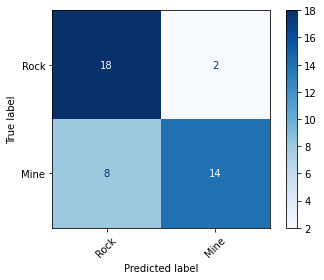

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay

#labels = ['class1', 'class2']
cm = ConfusionMatrixDisplay.from_estimator(classifier, 
                                      X_test, 
                                      y_test,
                                      cmap='Blues',
                                      display_labels=labels,
                                      xticks_rotation=45,
                                      )
cm;

In [22]:
from sklearn.metrics import classification_report
#labels = ['class1', 'class2']
print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

        Rock       0.69      0.90      0.78        20
        Mine       0.88      0.64      0.74        22

    accuracy                           0.76        42
   macro avg       0.78      0.77      0.76        42
weighted avg       0.79      0.76      0.76        42



In [23]:
# per ROC curve

!pip install plot-metric --quiet

In [24]:
from plot_metric.functions import BinaryClassification
y_pred_proba = classifier.predict_proba(X_test)[::,1]

#labels = ['class1', 'class2']
bc = BinaryClassification(y_test, y_pred_proba, labels=labels)

# Figures
plt.figure(figsize=(10,10))
bc.plot_roc_curve();

ValueError: ignored

<Figure size 720x720 with 0 Axes>

In [25]:
# Figures
plt.figure(figsize=(10,10))
bc.plot_precision_recall_curve();

ValueError: ignored

<Figure size 720x720 with 0 Axes>

In [26]:
input_data = [3.89,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4,3.89,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4,3.89,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4,3.89,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0]

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = sc.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction[0])

if (prediction[0] == 0):
  print('Rock')
else:
  print('Mine')

[[167.99164263 125.65480753 154.99520921  52.63445869  34.66134868
  111.25141783  79.00606806  21.91045394  27.1353654   13.32996235
   13.30019486  -1.79142663  12.25132606  -1.81875296   8.2016752
    8.6948532   13.17849712  14.26234522  21.30020486   7.37484692
    5.39465282  23.6758219   17.42678363   5.55193486  11.04232609
    5.48014647   5.28333724  -2.9253562    5.65321304  -2.64090771
    7.03251031   9.20780602  16.82712999  16.43229865  21.81618113
    8.07801829   6.85311615  29.89360314  23.52467531   9.45245123
   18.14165616  10.2041888   12.61870759  -1.60826736  11.89712315
   -1.20016976  21.59385754  37.03225945 106.7849957  304.96935533
  498.73804842 258.87877179 281.996247   914.49698984 704.2909473
  349.09820051 587.30636538 307.90195617 322.29126614  -1.29794963]]
M
Mine


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
